<a href="https://colab.research.google.com/github/SamaSamrin/2024/blob/main/Isolation_Forest_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive/')

Mounted at /content/mydrive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option("display.float", "{:.2f}".format)
#%matplotlib inline
#sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("/content/mydrive/MyDrive/0_code_drive/creditcard.csv")
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset has 31 columns consisting of 30 potential features and 1 label column “Class” (anomalies=1). We also confirm that the class contains a very low number of anomalies (492).

In [45]:
df_small = df[501:551]

In [30]:
df_small.shape

(50, 31)

In [46]:
df_small['Class'].value_counts()

0    49
1     1
Name: Class, dtype: int64

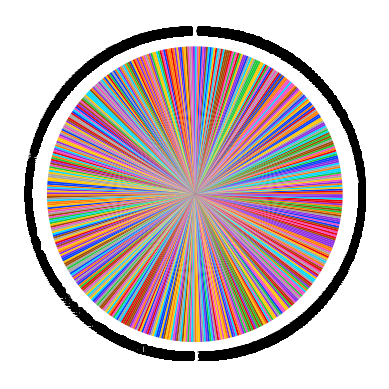

In [49]:
palette_color = sns.color_palette('bright')
plt.pie(df['Class'], labels=df['Class'], colors=palette_color)
plt.show()

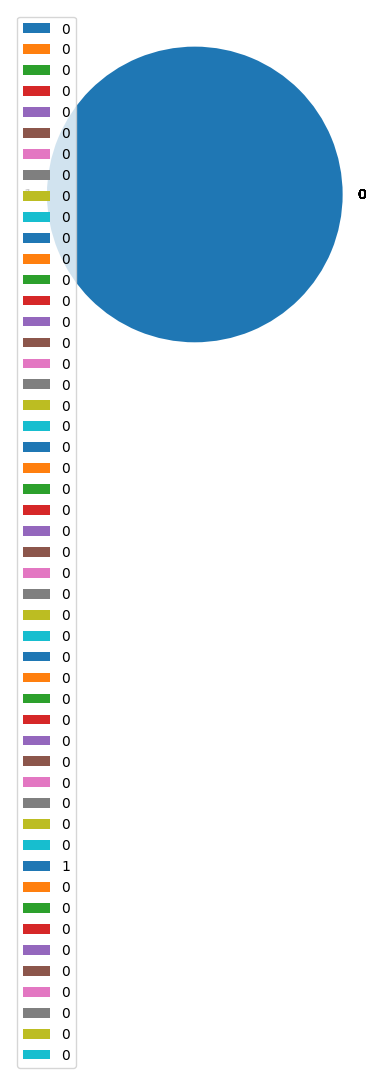

In [50]:
palette_color = sns.color_palette('bright')
plt.pie(df_small['Class'], labels=df_small['Class'])
plt.legend()
plt.show()

In [7]:
class_ratio_list = [df['Class'].value_counts()[0], df['Class'].value_counts()[1]]

In [8]:
print(class_ratio_list)

[284315, 492]


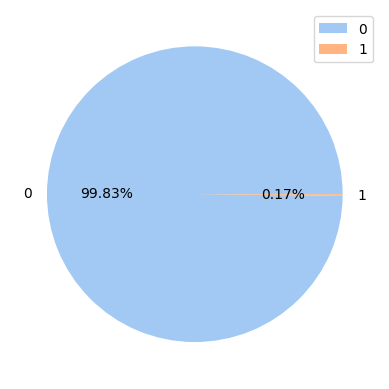

In [10]:
plt.pie(class_ratio_list, labels=[0, 1], colors=sns.color_palette('pastel'), autopct='%1.2f%%')
plt.legend()
plt.show()

As we can see from the pie chart above, our dataset has 0.17% anomalies

## **Time feature exploration**

In [11]:
sns.set_style("whitegrid")

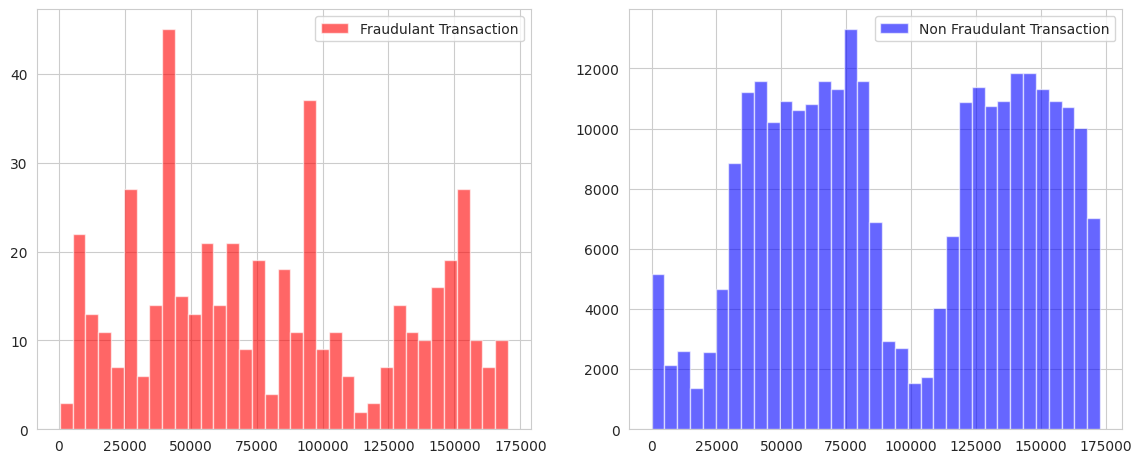

In [12]:
plt.figure(figsize=(14, 12))
plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='red', alpha=0.6, label="Fraudulant Transaction")

plt.legend()
plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

The dataset contains a time column (in seconds) which could potentially influence how we approach the problem. There appears to be no visual relationship in the time distributions between fraudulent and non-fraudulent transactions.

## IF model - 1, Contamination = 10%

In [13]:
X = df.drop('Class', axis=1)
y = df.Class

In [14]:
from sklearn.ensemble import IsolationForest

In [15]:
Iforest = IsolationForest(max_samples=100,
                          random_state=42,
                         contamination=0.1,
                         max_features=1.0,
                         n_estimators=100,
                         verbose=1,
                         n_jobs=-1)
Iforest.fit(X)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s finished
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, max_samples=100, n_jobs=-1, random_state=42,
                verbose=1)

In [16]:
y_pred = Iforest.predict(X)
y_pred_adjusted = [1 if x == -1 else 0 for x in y_pred]
sum(y_pred_adjusted)

28481

The algorithm identified 28481 data points as abnormal (approx 10%) which corresponds exactly with the contamination input parameter initially specified.

In [17]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y, y_pred_adjusted, average='macro')

(0.5074864711161692, 0.8907150784176889, 0.48895080475704383, None)

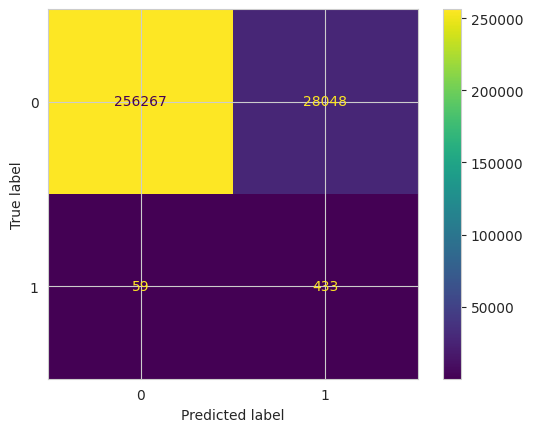

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred_adjusted)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

## IF model - 2, Contamination = 1%

In [19]:
X = df.drop('Class', axis=1)
y = df.Class

In [21]:
Iforest_2 = IsolationForest(max_samples=100,
                          random_state=42,
                         contamination=0.01,
                         max_features=1.0,
                         n_estimators=100,
                         verbose=1,
                         n_jobs=-1)
Iforest_2.fit(X)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, max_samples=100, n_jobs=-1, random_state=42,
                verbose=1)

In [22]:
y_pred_2 = Iforest_2.predict(X)
y_pred_adjusted_2 = [1 if x == -1 else 0 for x in y_pred_2]
sum(y_pred_adjusted_2)

2849

The algorithm identified 2849 data points as abnormal (approx 1%) which corresponds exactly with the contamination input parameter initially specified.

In [23]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y, y_pred_adjusted_2, average='macro')

(0.5471686452204827, 0.7708728002506094, 0.5786420162957869, None)

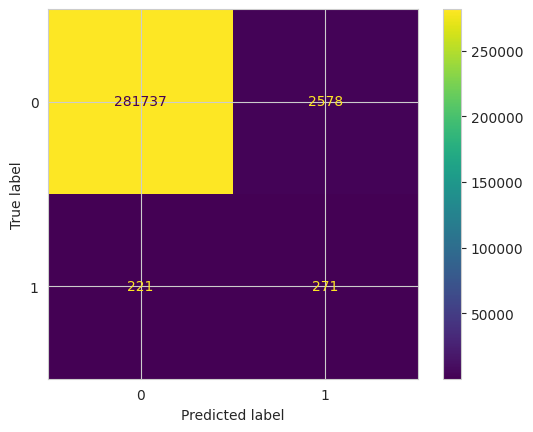

In [24]:
from sklearn.metrics import confusion_matrix

cm_2 = confusion_matrix(y, y_pred_adjusted_2)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=[0, 1])
disp.plot()
plt.show()

## IF Model - 3

In [ ]:
from sklearn.ensemble import IsolationForest

In [25]:
# selecting variables or features, whose anomalies we want to find
selected_columns_list = ['V4', 'V5']

In [26]:
model_if_3 = IsolationForest(contamination=0.1, random_state=42)

In [27]:
# run/train the model
model_if_3.fit(df[selected_columns_list])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [30]:
df_3 = df
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Creating predictions

In [31]:
# Adding anomaly score as a column to our dataframe
df_3['anomaly_score'] = model_if_3.decision_function(df[selected_columns_list])

In [41]:
df_3['anomaly_score'].describe()

count    284807.000000
mean          0.102363
std           0.069088
min          -0.260896
25%           0.076136
50%           0.129804
75%           0.150446
max           0.172145
Name: anomaly_score, dtype: float64

In [42]:
# Adding anomaly column to tell us if the score is an anomaly or not
df_3['anomaly'] = model_if_3.predict(df[selected_columns_list])

In [43]:
df_3['anomaly'].describe()

count    284807.000000
mean          0.799998
std           0.600004
min          -1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: anomaly, dtype: float64

In [56]:
predicted_anomalies_df = df_3.loc[df_3['anomaly'] == -1,:]

predicted_anomalies_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,anomaly_score,anomaly
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0,-0.065415,-1
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0,-0.196755,-1
57,39.0,-1.330882,0.267540,-0.168470,-0.701232,3.281972,3.216390,-0.059394,0.895430,-0.017779,...,-0.374793,1.014886,0.353992,-0.510327,0.159033,0.228708,13.84,0,-0.031201,-1
79,50.0,-0.671709,0.594503,0.216416,-0.867311,2.966908,3.632495,0.563295,0.673026,-0.188766,...,-0.331692,0.996382,0.502469,-0.518043,-0.208276,-0.116048,14.80,0,-0.000815,-1
83,53.0,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0,-0.093548,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284784,172768.0,-0.669662,0.923769,-1.543167,-1.560729,2.833960,3.240843,0.181576,1.282746,-0.893890,...,-0.373023,0.651122,1.073823,0.844590,-0.286676,-0.187719,40.00,0,-0.020222,-1
284785,172768.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,...,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0,-0.039655,-1
284786,172768.0,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0,-0.003866,-1
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0,-0.165667,-1


In [55]:
confirmed_anomalies_df = df_3.loc[df_3['Class'] == 1, :]

confirmed_anomalies_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,anomaly_score,anomaly
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,-0.040768,-1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,-0.007215,-1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,0.025135,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,-0.010471,-1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,-0.173517,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,0.023448,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,0.113293,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,0.130030,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,0.062573,1


In [33]:
df_3.loc[:, ['V1', 'V2', 'V3', 'V4', 'V5']]

,V1,V2,V3,V4,V5
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321
1,1.191857,0.266151,0.166480,0.448154,0.060018
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309
4,-1.158233,0.877737,1.548718,0.403034,-0.407193
...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961


In [34]:
anomaly_df = df_3[df_3['anomaly'] < 1]

In [35]:
display(anomaly_df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,anomaly_score,anomaly
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0,-0.065415,-1
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0,-0.196755,-1
57,39.0,-1.330882,0.267540,-0.168470,-0.701232,3.281972,3.216390,-0.059394,0.895430,-0.017779,...,-0.374793,1.014886,0.353992,-0.510327,0.159033,0.228708,13.84,0,-0.031201,-1
79,50.0,-0.671709,0.594503,0.216416,-0.867311,2.966908,3.632495,0.563295,0.673026,-0.188766,...,-0.331692,0.996382,0.502469,-0.518043,-0.208276,-0.116048,14.80,0,-0.000815,-1
83,53.0,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0,-0.093548,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284784,172768.0,-0.669662,0.923769,-1.543167,-1.560729,2.833960,3.240843,0.181576,1.282746,-0.893890,...,-0.373023,0.651122,1.073823,0.844590,-0.286676,-0.187719,40.00,0,-0.020222,-1
284785,172768.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,...,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0,-0.039655,-1
284786,172768.0,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0,-0.003866,-1
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0,-0.165667,-1


In [ ]:
df = df.dropna()

In [ ]:
anomaly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 4388 to 17011
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WELL           1329 non-null   object 
 1   DEPTH_MD       1329 non-null   float64
 2   GROUP          1329 non-null   object 
 3   FORMATION      1329 non-null   object 
 4   CALI           1329 non-null   float64
 5   RDEP           1329 non-null   float64
 6   RHOB           1329 non-null   float64
 7   GR             1329 non-null   float64
 8   NPHI           1329 non-null   float64
 9   PEF            1329 non-null   float64
 10  DTC            1329 non-null   float64
 11  LITH           1329 non-null   object 
 12  anomaly_score  1329 non-null   float64
 13  anomaly        1329 non-null   int64  
dtypes: float64(9), int64(1), object(4)
memory usage: 188.0+ KB


In [ ]:
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,anomaly_score,anomaly
count,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000
mean,2169.492778,12.833851,1.510445,2.175036,58.696609,0.385804,4.239308,117.639977,0.069161,0.800000
std,593.742839,3.670514,1.533181,0.235817,32.090900,0.151834,6.891200,36.005515,0.053960,0.600023
min,1149.648000,7.325138,0.264479,1.438999,6.024419,0.039013,1.525528,7.415132,-0.153260,-1.000000
25%,1654.630000,9.270689,0.708259,1.985819,42.678802,0.250505,2.404613,83.249586,0.038139,1.000000
50%,2159.612000,13.014988,0.910295,2.104366,60.153360,0.452551,3.191989,122.774113,0.071367,1.000000
75%,2690.130000,14.929195,1.467155,2.382383,75.884712,0.511027,4.889488,149.933315,0.112765,1.000000
max,3198.760000,25.717396,14.046203,2.648847,804.298950,0.733152,288.103638,205.208664,0.154760,1.000000


In [ ]:
anomaly_df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,anomaly_score,anomaly
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.0
mean,2194.891497,13.093433,2.999142,2.207107,41.831285,0.336419,4.599136,106.492504,-0.038207,-1.0
std,493.511105,3.570821,3.029503,0.351914,39.876582,0.211909,8.897702,41.204419,0.031396,0.0
min,1152.232000,7.480472,0.264479,1.438999,6.093219,0.039013,1.525528,7.613826,-0.153260,-1.0
25%,1839.272000,10.127096,0.740385,1.851881,13.526032,0.104261,2.824958,63.614796,-0.054591,-1.0
50%,2250.584000,12.586131,1.365619,2.203623,40.339241,0.347437,3.714228,102.566437,-0.030461,-1.0
75%,2595.016000,16.262522,5.110446,2.576642,60.117359,0.547961,5.511979,150.155838,-0.013182,-1.0
max,3092.968000,22.759352,14.046203,2.648847,792.756836,0.733152,232.342529,193.261139,-0.000006,-1.0


## Visualizations

In [ ]:
import seaborn as sns

In [ ]:
def outlier_plot(data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    method = f'{outlier_method_name}_anomaly'

    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 1329
Number of non anomalous values  11961
Total Number of Values: 13290


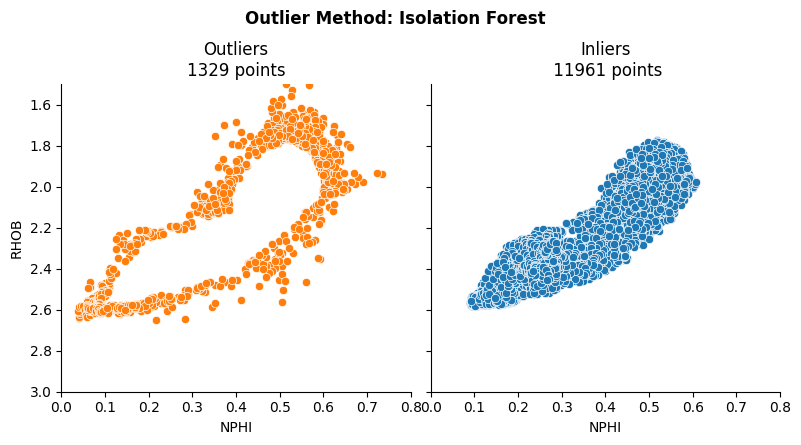

In [ ]:
outlier_plot(df, "Isolation Forest", "NPHI", "RHOB", [0, 0.8], [3, 1.5])

# Project Code

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np

# Load data from CSV file
data = pd.read_csv('/content/mydrive/MyDrive/0_code_drive/knn_2.csv')

# Train the Isolation Forest model
clf = IsolationForest(random_state=42)
clf.fit(data)

# Make predictions
pred = clf.predict(data)

# Convert predictions to binary (1 for inliers, -1 for outliers)
pred_binary = np.where(pred == 1, 0, 1)

# Add predictions to the DataFrame
data['anomaly'] = pred_binary

# Save the DataFrame with predictions to a new CSV file
data.to_csv('predictions.csv', index=False)

# Split data into train and test sets for evaluation
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Train the Isolation Forest model on training set
clf = IsolationForest(random_state=42)
clf.fit(X_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Convert predictions to binary (1 for inliers, -1 for outliers)
y_pred_binary = np.where(y_pred == 1, 0, 1)

# Assuming you have ground truth labels in 'ground_truth' column
y_test = X_test['ground_truth']

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_binary)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"AUC: {auc}")
print(f"Accuracy: {accuracy}")

KeyError: 'ground_truth'